In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import  pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(['Id', 'PetalLengthCm', 'PetalWidthCm', 'Species'], axis='columns', inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [4]:
km = KMeans(n_clusters=3)
predictions = km.fit_predict(df[['SepalLengthCm', 'SepalWidthCm']])
predictions

c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [5]:
km.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.006     , 3.418     ],
       [5.77358491, 2.69245283]])

In [15]:
df['cluster'] = predictions
df.head(50)

,SepalLengthCm,SepalWidthCm,cluster
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0
5,0.305556,0.791667,0
6,0.083333,0.583333,0
7,0.194444,0.583333,0
8,0.027778,0.375000,0
9,0.166667,0.458333,0


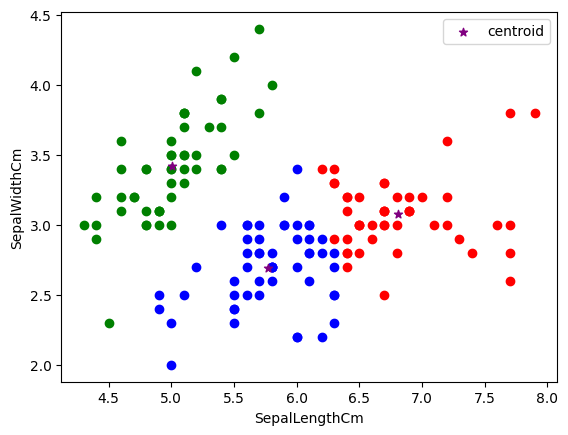

In [7]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], color='red')
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'], color='green')
plt.scatter(df3['SepalLengthCm'], df3['SepalWidthCm'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

In [8]:
scaler = MinMaxScaler()

scaler.fit(df[['SepalLengthCm']])
df['SepalLengthCm'] = scaler.transform(df[['SepalLengthCm']])

scaler.fit(df[['SepalWidthCm']])
df['SepalWidthCm'] = scaler.transform(df[['SepalWidthCm']])

df.head()

,SepalLengthCm,SepalWidthCm,cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1


In [9]:
km = KMeans(n_clusters=3)
predictions = km.fit_predict(df[['SepalLengthCm','SepalWidthCm']])
predictions

c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [16]:
df['cluster'] = predictions
df.head(50)

,SepalLengthCm,SepalWidthCm,cluster
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0
5,0.305556,0.791667,0
6,0.083333,0.583333,0
7,0.194444,0.583333,0
8,0.027778,0.375000,0
9,0.166667,0.458333,0


In [11]:
km.cluster_centers_

array([[0.19897959, 0.60034014],
       [0.69562648, 0.45390071],
       [0.40483539, 0.28009259]])

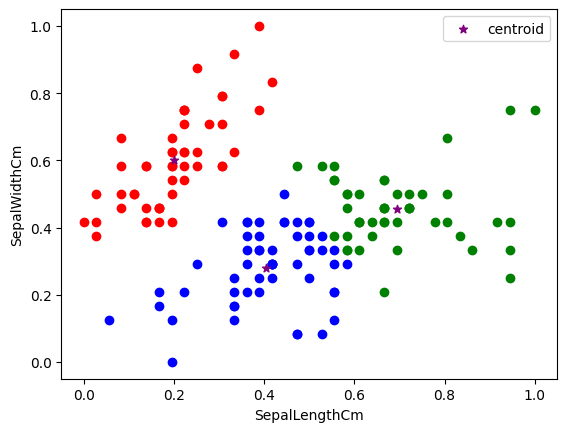

In [12]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], color='red')
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'], color='green')
plt.scatter(df3['SepalLengthCm'], df3['SepalWidthCm'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

In [13]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters= k)
    km.fit(df[['SepalLengthCm', 'SepalWidthCm']])
    sse.append(km.inertia_)


c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

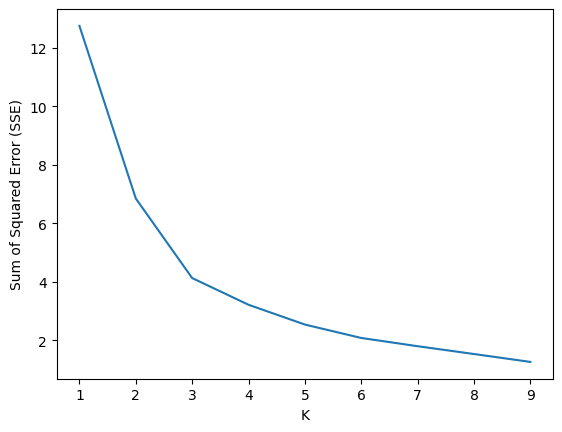

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(k_rng, sse)